# Circumbinary Planet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from astropy import constants as const
from astropy import units as u

In [2]:
plt.rcParams.update({'font.size': 14, 'text.usetex': True})

In [3]:
#vector input has initial conditions for 3 bodies

def threebodyfunc(vec, t):
    #assigning the initial conditions to vector elements
    x1, y1, z1 = vec[0], vec[1], vec[2]
    vx1, vy1, vz1 = vec[3], vec[4], vec[5]
    
    x2, y2, z2 = vec[6], vec[7], vec[8]
    vx2, vy2, vz2 = vec[9], vec[10], vec[11]
    
    x3, y3, z3 = vec[12], vec[13], vec[14]
    vx3, vy3, vz3 = vec[15], vec[16], vec[17]
    
    #separation vectors
    dx12, dy12, dz12 = x2-x1, y2-y1, z2-z1
    dx13, dy13, dz13 = x3-x1, y3-y1, z3-z1
    dx23, dy23, dz23 = x3-x2, y3-y2, z3-z2

    d12 = np.sqrt(dx12**2+dy12**2+dz12**2)
    d13 = np.sqrt(dx13**2+dy13**2+dz13**2)
    d23 = np.sqrt(dx23**2+dy23**2+dz23**2)
    
    #acceleration calculations
#     Gmr3_1 = G*m2/d12**3 + G*m3/d13**3       #acceleration on body 1 due to bodies 2 and 3
#     Gmr3_2 = G*m1/d12**3 + G*m3/d23**3       #acceleration on body 2 due to bodies 1 and 3
#     Gmr3_3 = G*m1/d13**3 + G*m2/d23**3       #acceleration on body 3 due to bodies 1 and 2
    ax1 = (G*m2/d12**3)*dx12 + (G*m3/d13**3)*dx13
    ay1 = (G*m2/d12**3)*dy12 + (G*m3/d13**3)*dy13
    az1 = (G*m2/d12**3)*dz12 + (G*m3/d13**3)*dz13
    ax2 = -(G*m1/d12**3)*dx12 + (G*m3/d23**3)*dx23
    ay2 = -(G*m1/d12**3)*dy12 + (G*m3/d23**3)*dy23
    az2 = -(G*m1/d12**3)*dz12 + (G*m3/d23**3)*dz23
    ax3 = -(G*m1/d13**3)*dx13 - (G*m2/d23**3)*dx23
    ay3 = -(G*m1/d13**3)*dy13 - (G*m2/d23**3)*dy23
    az3 = -(G*m1/d13**3)*dz13 - (G*m2/d23**3)*dz23
    
    #idk what to do for these
    
    #vector with derivatives of initial vector giving velocity and acceleration
    dvec = np.zeros(len(vec))
    dvec[0], dvec[1], dvec[2] = vx1, vy1, vz1
    dvec[3], dvec[4], dvec[5] = ax1, ay1, az1
    
    dvec[6], dvec[7], dvec[8] = vx2, vy2, vz2
    dvec[9], dvec[10], dvec[11] = ax2, ay2, az2
    
    dvec[12], dvec[13], dvec[14] = vx3, vy3, vz3
    dvec[15], dvec[16], dvec[17] = ax3, ay3, az3
    
    return dvec

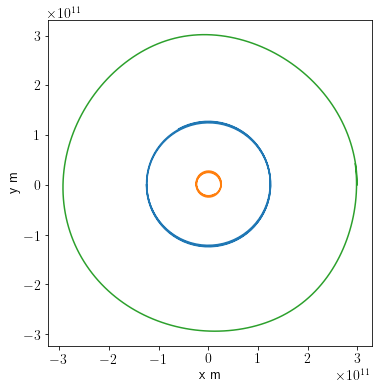

In [39]:
#initial conditions, starting with 2 sun types and planet
m1 = (1 * u.Msun).decompose().value
m2 = (5 * u.Msun).decompose().value
m3 = (10 * u.Mjup).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (1 * u.AU).decompose().value
a3 = (2 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = 2*np.pi*np.sqrt((a**3)/(G*(m1+m2)))
P3 = 2*np.pi*np.sqrt((r3**3)/(G*(m1+m2)))

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,P3,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel('x m')
plt.ylabel('y m')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()


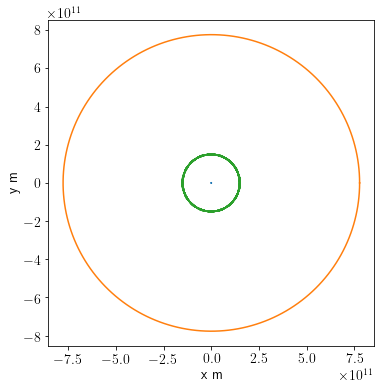

In [42]:
#initial conditions, sun jupiter earth
m1 = (1 * u.Msun).decompose().value
m2 = (1 * u.Mjup).decompose().value
m3 = (1 * u.Mearth).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (5.2 * u.AU).decompose().value
a3 = (1 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = 2*np.pi*np.sqrt((a**3)/(G*(m1+m2)))
P3 = 2*np.pi*np.sqrt((r3**3)/(G*(m1+m2)))

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,P,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel('x m')
plt.ylabel('y m')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()


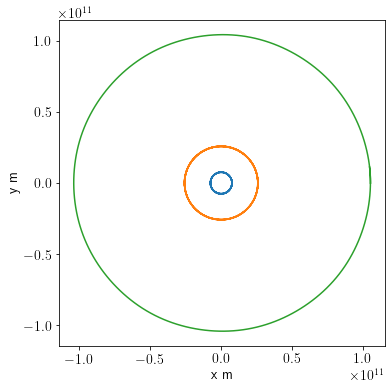

In [48]:
#using the known conditions of the Kepler-16 system to check

#initial conditions, Kepler-16 system
m1 = (0.6897 * u.Msun).decompose().value
m2 = (0.20255 * u.Msun).decompose().value
m3 = (0.333 * u.Mjup).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (0.22431 * u.AU).decompose().value
a3 = (0.7048 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = (41.079 * u.day).decompose().value
P3 = (228.776 * u.day).decompose().value

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,P3,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel('x m')
plt.ylabel('y m')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()

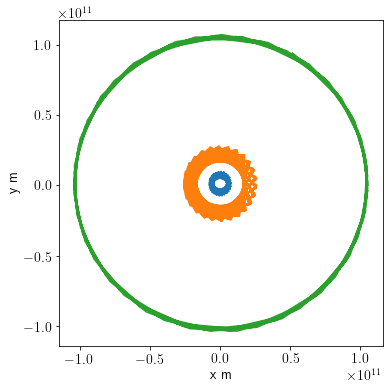

In [53]:
#same as above but with more time to see how the orbits behave after 10 planetary revolutions
#using the known conditions of the Kepler-16 system to check

#initial conditions, Kepler-16 system
m1 = (0.6897 * u.Msun).decompose().value
m2 = (0.20255 * u.Msun).decompose().value
m3 = (0.333 * u.Mjup).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (0.22431 * u.AU).decompose().value
a3 = (0.7048 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = (41.079 * u.day).decompose().value
P3 = (228.776 * u.day).decompose().value

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,10*P3,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel('x m')
plt.ylabel('y m')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()

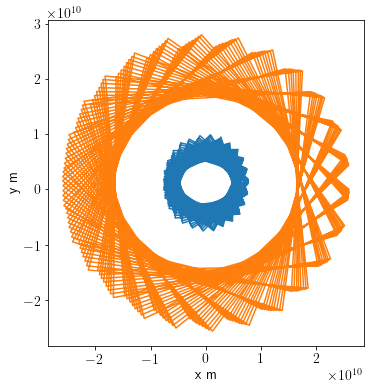

In [51]:
#close up of the binary stars after 10 planetary revolutions

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlabel('x m')
plt.ylabel('y m')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()

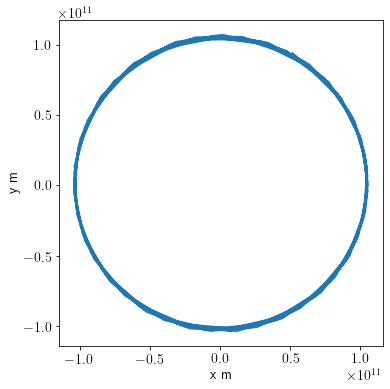

In [52]:
#just the planet orbit after 10 planetary revolutions

plt.figure(figsize=(6,6))
plt.plot(x3,y3)
plt.xlabel('x m')
plt.ylabel('y m')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()